In [1]:
# !pip install scikit-multilearn
# !pip install PyEvALL
# !pip install datasets

# import pandas as pd
# import os
# from google.colab import drive
# drive.mount('/content/drive/')
# import sys
# sys.path.append('drive/MyDrive/Colab/thesis/models')
# from utils_classification import *

In [2]:
# !pip install bottleneck --upgrade

In [3]:
# import nltk
# nltk.download('punkt_tab')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('universal_tagset')

In [4]:
# dir = "/content/drive/MyDrive/Colab/thesis"

In [1]:
import pandas as pd
import os
from utils_classification import *

# MAMI

In [2]:
#txt files with gold labels for MAMI f1 metric
# gold_dev_txt = dir+"/models/evaluation/golds/MAMI/MAMI_validation_truth.txt"
# gold_test_txt = dir+"/models/evaluation/golds/MAMI/MAMI_test_truth.txt"
gold_dev_txt = "evaluation/golds/MAMI/MAMI_validation_truth.txt"
gold_test_txt = "evaluation/golds/MAMI/MAMI_test_truth.txt"

In [3]:
# mami_training_data = dir+"/data/MAMI/MAMI_training.json"
# mami_val_data = dir+"/data/MAMI/MAMI_validation.json"
# mami_test_data = dir+"/data/MAMI/MAMI_test.json"

mami_training_data = "../data/MAMI/MAMI_training.json"
mami_val_data = "../data/MAMI/MAMI_validation.json"
mami_test_data = "../preprocessing/datasets/MAMI_test.json"

mami_train_df = pd.read_json(mami_training_data,orient='index')
mami_dev_df = pd.read_json(mami_val_data,orient='index')
mami_test_df = pd.read_json(mami_test_data,orient='index')

In [4]:
# #remove user mentions and urls
# mami_train_df["svm representation"] = mami_train_df["svm representation"].apply(lambda x:re.sub(r'(@\w+\s*)+', "",x)) # removes single/multiple @USER)
# mami_train_df["svm representation"] = mami_train_df["svm representation"].apply(remove_urls) #remove urls from meme generation websites
# mami_dev_df["svm representation"] = mami_dev_df["svm representation"].apply(lambda x:re.sub(r'(@\w+\s*)+', "",x))
# mami_dev_df["svm representation"] = mami_dev_df["svm representation"].apply(remove_urls)
# mami_test_df["svm representation"] = mami_test_df["svm representation"].apply(lambda x:re.sub(r'(@\w+\s*)+', "",x))
# mami_test_df["svm representation"] = mami_test_df["svm representation"].apply(remove_urls)

## Binary Classification

In [5]:
ds_name = "MAMI"
evaluation_type = "binary"
model_name = "svm_stylometric_emotion"

In [6]:
#get stylometric emotion features
mami_train = get_stylometric_emotion_features(mami_train_df)
mami_dev = get_stylometric_emotion_features(mami_dev_df)

In [7]:
row = mami_dev.loc["10220.jpg"]
for col, value in row.items():
    print(f"{col}: {value}")

text: PARKOUR PARK WHORE KNOW THE DIFFERENCE avainÄ“mieltym. a woman in a bikini on the beach with a man jumping over her
misogynous: 1
lemmas: PARKOUR PARK WHORE KNOW THE DIFFERENCE avainÄ “ mieltym . a woman in a bikini on the beach with a man jumping over her
upos: NOUN NOUN NOUN NOUN NOUN NOUN NOUN NOUN NOUN . DET NOUN ADP DET NOUN ADP DET NOUN ADP DET NOUN NOUN ADP PRON
pos_fw_emo: NOUN NOUN WHORE NOUN NOUN NOUN NOUN NOUN NOUN . a NOUN in a NOUN on the beach with a NOUN NOUN over her
count: 2
emotion_associations: disgust negative joy


In [8]:
mami_dev.head()

,text,misogynous,lemmas,upos,pos_fw_emo,count,emotion_associations
10014.jpg,HOOKER MY DICK VIRGIN ME. a bird,0,HOOKER MY DICK VIRGIN ME . a bird,NOUN NOUN NOUN NOUN NOUN . DET NOUN,NOUN NOUN NOUN VIRGIN NOUN . a NOUN,1,positive trust
10025.jpg,BestDemotivationalPosters.com FIRST LEVEL Your...,1,BestDemotivationalPosters.com FIRST LEVEL Your...,NOUN NOUN NOUN PRON ADJ NOUN VERB VERB ADJ CON...,NOUN NOUN LEVEL Your ADJ ability VERB VERB lim...,6,positive trust positive anger negative sadness...
1003.jpg,One whiskey and .........one coke. Why the big...,0,One whiskey and ......... one coke . Why the b...,NUM NOUN CONJ VERB NUM NOUN . ADV DET ADJ NOUN...,One NOUN CONJ VERB one NOUN . ADV the ADJ NOUN...,1,anger fear
10030.jpg,Verizon LTE 4:41 PM Bikram Dec 11 at 12:31 AM ...,1,Verizon LTE 4:41 PM Bikram Dec 11 at 12:31 AM ...,NOUN NOUN NUM NOUN NOUN NOUN NUM ADP NUM NOUN ...,NOUN NOUN 4:41 NOUN NOUN NOUN 11 at 12:31 NOUN...,6,anger disgust fear negative sadness anger disg...
1005.jpg,Is four a lot? Black slaves owned per person? ...,1,Is four a lot ? Black slave owned per person ?...,VERB NUM DET NOUN . NOUN VERB VERB ADP NOUN . ...,VERB four a NOUN . Black slave VERB per NOUN ....,4,negative sadness anger fear negative sadness n...


In [9]:
#find best parameters and train model
clf_svc, vec1, vec2, vec3 = create_binary_classifier_emotion(mami_train,hpt=True)
#make predictions on dev data
y_pred_dev = classify_data_emotion(mami_dev, clf_svc, vec1, vec2, vec3)
#format the predictions for PyEvall function and save the predictions to a JSON file
dev_pred_json,dev_pred_txt = save_evaluation(mami_dev_df, "evaluation/predictions", ds_name, "validation", evaluation_type, model_name, y_pred_dev, "misogynous", [])

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best model was: LinearSVC(C=0.1, max_iter=30000, random_state=0)
The best parameter values were: {'C': 0.1}
The best f1-score was: 0.8007265798244163
Saved MAMI validation split binary evaluation to evaluation/predictions/MAMI/svm_stylometric_emotion_MAMI_validation_binary.json
Saved MAMI validation split to evaluation/predictions/MAMI/svm_stylometric_emotion_MAMI_validation_answer.txt


----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo:
                precision    recall  f1-score   support

non-mysogynous       0.79      0.81      0.80       483
    misogynous       0.82      0.80      0.81       517

      accuracy                           0.81      1000
     macro avg       0.81      0.81      0.81      1000
  weighted avg       0.81      0.81      0.81      1000

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Style-Emo:


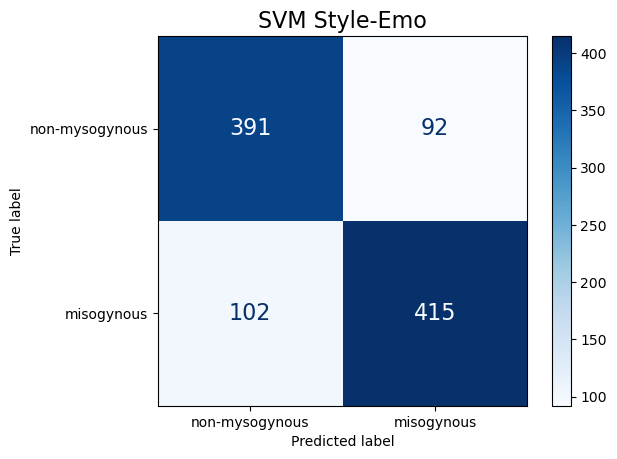

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo:

2025-07-14 09:07:37,376 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-07-14 09:07:37,432 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:37,540 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-07-14 09:07:37,540 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:37,648 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:37,755 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
cargado 29
This is a ta

In [10]:
y_dev = mami_dev["misogynous"].to_numpy()
gold_path_dev_binary = "evaluation/golds/MAMI/MAMI_validation_binary.json"
evaluate_binary_classification(gold_path_dev_binary,dev_pred_json,
                               y_dev,y_pred_dev,
                               ["non-mysogynous","misogynous"],
                               gold_dev_txt,dev_pred_txt,
                               model_name="SVM Style-Emo")

In [11]:
#get stylometric emotion features
mami_test = get_stylometric_emotion_features(mami_test_df)
y_test = mami_test[["misogynous"]].to_numpy()
#make predictions on test data
y_pred_test = classify_data_emotion(mami_test, clf_svc, vec1, vec2, vec3)

Saved MAMI test split binary evaluation to evaluation/predictions/MAMI/svm_stylometric_emotion_MAMI_test_binary.json
Saved MAMI test split to evaluation/predictions/MAMI/svm_stylometric_emotion_MAMI_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo:
                precision    recall  f1-score   support

non-mysogynous       0.76      0.47      0.59       500
    misogynous       0.62      0.85      0.72       500

      accuracy                           0.66      1000
     macro avg       0.69      0.66      0.65      1000
  weighted avg       0.69      0.66      0.65      1000

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Style-Emo:


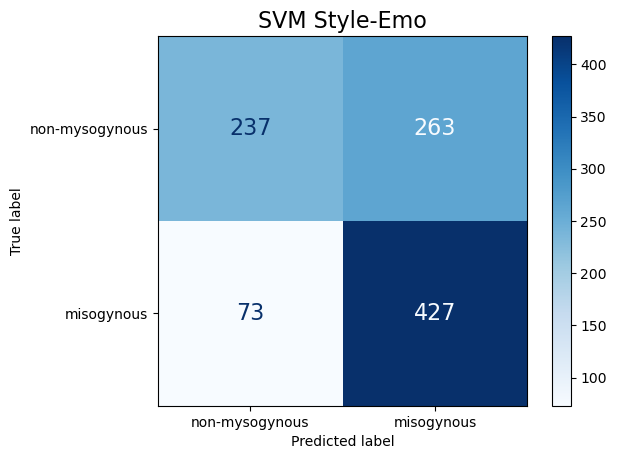

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo:

2025-07-14 09:07:38,655 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-07-14 09:07:38,694 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:38,801 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-07-14 09:07:38,802 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:38,908 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:39,013 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL

In [12]:
gold_path_test_binary = "evaluation/golds/MAMI/MAMI_test_binary.json"
#create file with predictions
test_pred_json,test_pred_txt = save_evaluation(mami_test_df, "evaluation/predictions", ds_name, "test", evaluation_type, model_name, y_pred_test, "misogynous", [])
#get evaluation metrics
evaluate_binary_classification(gold_path_test_binary,test_pred_json,
                               y_test,y_pred_test,
                               ["non-mysogynous","misogynous"],
                               gold_test_txt,test_pred_txt,
                               model_name="SVM Style-Emo")

In [11]:
#save predictions on test set
output_dir = f"output/{ds_name}" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(mami_test_df, y_pred_test, ["misogynous"], output_path)

Predictions saved to output/MAMI/svm_stylometric_emotion_MAMI_test_binary.csv


## Multilabel Classification

### Hierarchical classification with RoBERTa first step:

In [16]:
ds_name = "MAMI"
evaluation_type = "hierarchical"
model_name = "svm_stylometric_emotion_w_roberta"
binary_label = "misogynous"
fine_grained_labels = ["shaming","stereotype","objectification","violence"]
mami_label_names = ["misogynous","shaming","stereotype","objectification","violence"]

In [17]:
#load first-level binary predictions from ensemble
binary_preds = pd.read_csv(f"output/{ds_name}/roberta_{ds_name}_test_binary.csv")
y_pred_binary = binary_preds["misogynous_prediction"].to_numpy()

In [18]:
#get stylometric emotion features
mami_train = get_stylometric_emotion_features(mami_train_df,label_col=mami_label_names)
mami_test = get_stylometric_emotion_features(mami_test_df,label_col=mami_label_names)

In [19]:
test_positive = mami_test.copy()
test_positive["binary_pred"] = y_pred_binary
test_positive = test_positive[test_positive["binary_pred"] == 1]

#initialize df with predictions for binary classification which will be populated with the categories
#default all fine-grained labels to 0
pred_df = pd.DataFrame({binary_label: y_pred_binary}) 
pred_df[fine_grained_labels] = 0

#only the instances with positive class at binary level will be use to train the fine-grained categories
train_bin_pos = mami_train[mami_train[binary_label] == 1] #only the instances with positive class in binary level

clf = LinearSVC(C=0.1, max_iter=30000, random_state=0)
multilabel_model,vec_tfidf1_, vec_tfidf2_, vec_char_ngram_ = create_multilabel_classifier_emotion(train_bin_pos,
                                                                                                fine_grained_labels,
                                                                                                model=clf)

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
y_pred_multilabel = classify_data_emotion(test_positive,
                                        multilabel_model,
                                        vec_tfidf1_, 
                                        vec_tfidf2_, 
                                        vec_char_ngram_, 
                                        ) #this only applies to those that were labelled as 1 in binary

#add fine-grained labels to the positive instances in the predictions df to get the labels for full dataset
pred_df.loc[y_pred_binary == 1, fine_grained_labels] = y_pred_multilabel.toarray() 

In [21]:
y_test_all = mami_test_df[mami_label_names]
gold_path_test_ml = "evaluation/golds/MAMI/MAMI_test_hierarchical.json"
#predict on test dataset
test_pred_json_ml,test_pred_txt_ml = save_evaluation(mami_test_df, "evaluation/predictions", ds_name, "test", evaluation_type, model_name, pred_df, "misogynous", mami_label_names)
#get multi-label evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test_all,pred_df.to_numpy(),
                                   mami_label_names,
                                   gold_test_txt,test_pred_txt_ml)

Saved MAMI test split hierarchical evaluation to evaluation/predictions/MAMI/svm_stylometric_emotion_w_roberta_MAMI_test_hierarchical.json
Saved MAMI test split to evaluation/predictions/MAMI/svm_stylometric_emotion_w_roberta_MAMI_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

 non-misogynous       0.84      0.55      0.66       500
        shaming       0.30      0.34      0.32       146
     stereotype       0.51      0.53      0.52       350
objectification       0.60      0.55      0.57       348
       violence       0.66      0.37      0.47       153

      micro avg       0.60      0.51      0.55      1497
      macro avg       0.58      0.47      0.51      1497
   weighted avg       0.63      0.51      0.56      1497
    samples avg       0.60      0.53      0.54      1497

--------------------------------------------------------

2025-06-24 16:20:38,140 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:20:38,282 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:20:38,283 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:20:38,423 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:20:38,562 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_roberta_MAMI_test_hierarchical.json	-0.3885407310849899	0.3968142077404566	0.5135524051258686

	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_roberta_MAMI_test_hierarch

In [10]:
#save predictions on test set
output_dir = f"output/{ds_name}/roberta_first_step" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(mami_test_df, pred_df.to_numpy(), mami_label_names, output_path)

Predictions saved to output/MAMI/roberta_first_step/svm_stylometric_emotion_w_roberta_MAMI_test_hierarchical.csv


# EXIST2024

In [2]:
#txt files with gold labels for MAMI f1 metric
gold_dev_txt = "evaluation/golds/EXIST2024/EXIST2024_validation_truth.txt"
gold_test_txt = "evaluation/golds/EXIST2024/EXIST2024_test_truth.txt"

In [3]:
exist_training_data = "../data/EXIST2024/EXIST2024_training.json"
exist_val_data = "../data/EXIST2024/EXIST2024_validation.json"
exist_test_data = "../data/EXIST2024/EXIST2024_test.json"

exist_train_df = pd.read_json(exist_training_data,orient='index')
exist_dev_df = pd.read_json(exist_val_data,orient='index')
exist_test_df = pd.read_json(exist_test_data,orient='index')

In [15]:
# #remove user mentions and urls
# exist_train_df["svm representation"] = exist_train_df["svm representation"].apply(lambda x:re.sub(r'(@\w+\s*)+', "",x)) # removes single/multiple @USER)
# exist_train_df["svm representation"] = exist_train_df["svm representation"].apply(remove_urls) #remove urls from meme generation websites
# exist_dev_df["svm representation"] = exist_dev_df["svm representation"].apply(lambda x:re.sub(r'(@\w+\s*)+', "",x)) # removes single/multiple @USER and replaces them with one 'user_mention')
# exist_dev_df["svm representation"] = exist_dev_df["svm representation"].apply(remove_urls) #remove urls from meme generation websites
# exist_test_df["svm representation"] = exist_test_df["svm representation"].apply(lambda x:re.sub(r'(@\w+\s*)+', "",x))
# exist_test_df["svm representation"] = exist_test_df["svm representation"].apply(remove_urls)

### Binary classification

In [4]:
ds_name = "EXIST2024"
evaluation_type = "binary"
model_name = "svm_stylometric_emotion"

In [5]:
#get stylometric emotion features
exist_train = get_stylometric_emotion_features(exist_train_df,label_col=["sexist"])
exist_dev = get_stylometric_emotion_features(exist_dev_df,label_col=["sexist"])

In [6]:
#find best parameters and train model
clf_svc, vec1, vec2, vec3 = create_binary_classifier_emotion(exist_train,binary_label="sexist",hpt=True)
#make predictions on dev data
y_pred_dev = classify_data_emotion(exist_dev, clf_svc, vec1, vec2, vec3)
#format the predictions for PyEvall function and save the predictions to a JSON file
dev_pred_json,dev_pred_txt = save_evaluation(exist_dev_df, "evaluation/predictions", ds_name, "validation", evaluation_type, model_name, y_pred_dev, "sexist", [])

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best model was: LinearSVC(C=0.1, max_iter=30000, random_state=0)
The best parameter values were: {'C': 0.1}
The best f1-score was: 0.59673053334279
Saved EXIST2024 validation split binary evaluation to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_binary.json
Saved EXIST2024 validation split to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_answer.txt


----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo:
              precision    recall  f1-score   support

  non-sexist       0.66      0.59      0.62        73
      sexist       0.66      0.72      0.69        80

    accuracy                           0.66       153
   macro avg       0.66      0.66      0.66       153
weighted avg       0.66      0.66      0.66       153

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Style-Emo:


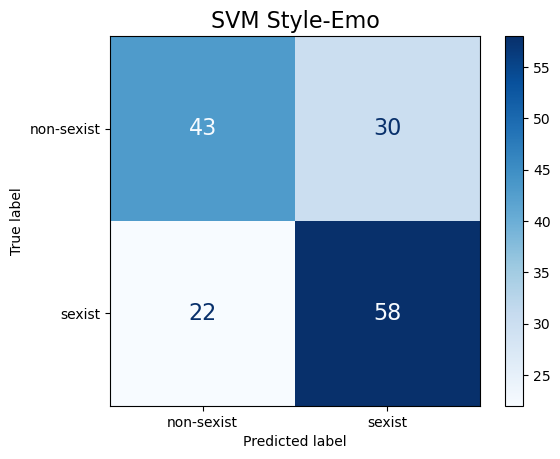

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo:

2025-07-16 11:21:47,398 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-07-16 11:21:47,417 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-16 11:21:47,434 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-07-16 11:21:47,435 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-16 11:21:47,450 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-16 11:21:47,465 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
cargado 29
This is a ta

In [7]:
y_dev = exist_dev["sexist"].to_numpy()
gold_path_dev_binary = "evaluation/golds/EXIST2024/EXIST2024_validation_binary.json"
evaluate_binary_classification(gold_path_dev_binary,dev_pred_json,
                               y_dev,y_pred_dev,
                               ["non-sexist","sexist"],
                               gold_dev_txt,dev_pred_txt,
                               model_name="SVM Style-Emo")

In [8]:
#get stylometric emotion features
exist_test = get_stylometric_emotion_features(exist_test_df,label_col=["sexist"])
y_test = exist_test[["sexist"]].to_numpy()
#make predictions on test data
y_pred_test = classify_data_emotion(exist_test, clf_svc, vec1, vec2, vec3)

In [12]:
row = exist_test.loc[210332]
for col, value in row.items():
    print(f"{col}: {value}")

text: me Listening to the same sad song on repeat, making sure it does enough damage. a woman in a bathtub with a heart shaped heart in the middle
sexist: 0
lemmas: me Listening to the same sad song on repeat , making sure it doe enough damage . a woman in a bathtub with a heart shaped heart in the middle
upos: PRON VERB PRT DET ADJ NOUN NOUN ADP NOUN . VERB ADJ PRON VERB ADJ NOUN . DET NOUN ADP DET NOUN ADP DET NOUN VERB NOUN ADP DET NOUN
pos_fw_emo: me VERB PRT the ADJ NOUN NOUN on NOUN . VERB ADJ it VERB ADJ damage . a NOUN in a NOUN with a NOUN VERB NOUN in the NOUN
count: 1
emotion_associations: anger disgust negative sadness


Saved EXIST2024 test split binary evaluation to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_binary.json
Saved EXIST2024 test split to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo:
              precision    recall  f1-score   support

  non-sexist       0.63      0.53      0.58        76
      sexist       0.67      0.76      0.71        95

    accuracy                           0.65       171
   macro avg       0.65      0.64      0.64       171
weighted avg       0.65      0.65      0.65       171

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Style-Emo:


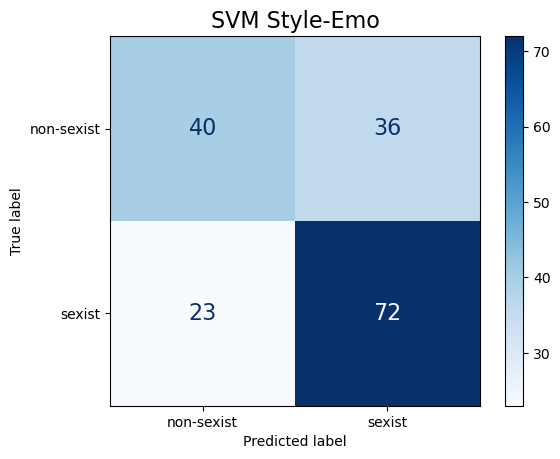

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo:

2025-07-14 09:07:41,738 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-07-14 09:07:41,754 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:41,779 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-07-14 09:07:41,781 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:41,800 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-07-14 09:07:41,822 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL

In [21]:
gold_path_test_binary = "evaluation/golds/EXIST2024/EXIST2024_test_binary.json"
#create file with predictions
test_pred_json,test_pred_txt = save_evaluation(exist_test_df, "evaluation/predictions", ds_name, "test", evaluation_type, model_name, y_pred_test, "sexist", [])
#get evaluation metrics
evaluate_binary_classification(gold_path_test_binary,test_pred_json,
                               y_test,y_pred_test,
                               ["non-sexist","sexist"],
                               gold_test_txt,test_pred_txt,
                               model_name="SVM Style-Emo")

In [20]:
#save predictions on test set
output_dir = f"output/{ds_name}" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(exist_test_df, y_pred_test, ["sexist"], output_path)

Predictions saved to output/EXIST2024/svm_stylometric_emotion_EXIST2024_test_binary.csv


## Multilabel Classification

### Flat (all labels)

In [21]:
ds_name = "EXIST2024"
evaluation_type = "flat"
model_name = "svm_stylometric_emotion"

exist_label_names = ["sexist","ideological-inequality","stereotyping-dominance","objectification", "sexual-violence", "misogyny-non-sexual-violence"]

In [22]:
#get stylometric emotion features
exist_train = get_stylometric_emotion_features(exist_train_df,label_col=exist_label_names)
exist_dev = get_stylometric_emotion_features(exist_dev_df,label_col=exist_label_names)

In [23]:
multi_clf,vec1,vec2,vec3 = create_multilabel_classifier_emotion(exist_train,exist_label_names,hpt=True)
#make predictions on dev data
y_pred_dev = classify_data_emotion(exist_dev, multi_clf, vec1, vec2, vec3)

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best model was: BinaryRelevance(classifier=LinearSVC(C=0.1, max_iter=30000, random_state=0),
                require_dense=[True, True])
The best parameter values were: {'classifier__C': 0.1}
The best f1-score was: 0.3381963198580582


In [24]:
gold_path_dev_ml = "evaluation/golds/EXIST2024/EXIST2024_validation_flat.json"
y_dev = exist_dev_df[exist_label_names].to_numpy()
y_pred_dev = y_pred_dev.toarray()
#create file with predictions
dev_pred_json_ml,dev_pred_txt_ml = save_evaluation(exist_dev_df, "evaluation/predictions", ds_name, "validation", evaluation_type, model_name, y_pred_dev, "sexist", exist_label_names)
#get evaluation metrics
evaluate_multilabel_classification(gold_path_dev_ml,dev_pred_json_ml,
                                   y_dev,y_pred_dev,
                                   exist_label_names,
                                   gold_dev_txt,dev_pred_txt_ml,
                                   hierarchy=False)

Saved EXIST2024 validation split flat evaluation to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_flat.json
Saved EXIST2024 validation split to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                              precision    recall  f1-score   support

                  non-sexist       0.66      0.59      0.62        73
      ideological-inequality       0.67      0.44      0.53        36
      stereotyping-dominance       0.35      0.28      0.31        39
             objectification       0.37      0.34      0.35        41
             sexual-violence       0.57      0.36      0.44        11
misogyny-non-sexual-violence       0.50      0.06      0.11        17

                   micro avg       0.53      0.41      0.46       217
                   macro avg       0.52      0.35

This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	F1
0	svm_stylometric_emotion_EXIST2024_validation_flat.json	0.43791737513976514

	files	F1
0	svm_stylometric_emotion_EXIST2024_validation_flat.json_EXIST2024	0.43791737513976514

	files	F1_yes	F1_ideological-inequality	F1_misogyny-non-sexual-violence	F1_stereotyping-dominance	F1_no	F1_objectification	F1_sexual-violence
0	svm_stylometric_emotion_EXIST2024_validation_flat.json_EXIST2024	0.6904761904761904	0.5333333333333333	0.10526315789473684	0.3142857142857143	0.6231884057971014	0.3544303797468355	0.4444444444444444

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MAMI F1 Metrics:

Binary classification macro-F1 score: 0.6568322981366459
Multi-label 

In [25]:
#get stylometric emotion features
exist_test = get_stylometric_emotion_features(exist_test_df,label_col=exist_label_names)
y_test = exist_test_df[exist_label_names].to_numpy()
#make predictions on test data
y_pred_test = classify_data_emotion(exist_test, multi_clf, vec1, vec2, vec3)
y_pred_test = y_pred_test.toarray()

In [26]:
gold_path_test_ml = "evaluation/golds/EXIST2024/EXIST2024_test_flat.json"
#create file with predictions
test_pred_json_ml,test_pred_txt_ml = save_evaluation(exist_test_df, "evaluation/predictions", ds_name, "test", evaluation_type, model_name, y_pred_test, "sexist", exist_label_names)
#get evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test,y_pred_test,
                                   exist_label_names,
                                   gold_test_txt,test_pred_txt_ml,
                                   hierarchy=False)

Saved EXIST2024 test split flat evaluation to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_flat.json
Saved EXIST2024 test split to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                              precision    recall  f1-score   support

                  non-sexist       0.63      0.53      0.58        76
      ideological-inequality       0.52      0.44      0.47        39
      stereotyping-dominance       0.41      0.38      0.39        40
             objectification       0.43      0.37      0.40        43
             sexual-violence       0.40      0.25      0.31        16
misogyny-non-sexual-violence       0.50      0.25      0.33        16

                   micro avg       0.51      0.42      0.46       230
                   macro avg       0.48      0.37      0.41       230
   

2025-05-06 10:47:29,655 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	F1
0	svm_stylometric_emotion_EXIST2024_test_flat.json	0.4553939181592724

	files	F1
0	svm_stylometric_emotion_EXIST2024_test_flat.json_EXIST2024	0.4553939181592724

	files	F1_yes	F1_ideological-inequality	F1_stereotyping-dominance	F1_no	F1_misogyny-non-sexual-violence	F1_objectification	F1_sexual-violence
0	svm_stylometric_emotion_EXIST2024_test_flat.json_EXIST2024	0.70935960591133	0.4722222222222222	0.38961038961038963	0.5755395683453236	0.3333333333333333	0.4	0.3076923076923077

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MAM

In [27]:
#save predictions on test set
output_dir = f"output/{ds_name}" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(exist_test_df, y_pred_test, exist_label_names, output_path)

Predictions saved to output/EXIST2024/svm_stylometric_emotion_EXIST2024_test_flat.csv


### Hierarchical classification: only fine-grained categories

In [4]:
ds_name = "EXIST2024"
evaluation_type = "hierarchical"
model_name = "svm_stylometric_emotion"
binary_label = "sexist"
fine_grained_labels = ["ideological-inequality","stereotyping-dominance","objectification", "sexual-violence", "misogyny-non-sexual-violence"]
exist_label_names = ["sexist","ideological-inequality","stereotyping-dominance","objectification", "sexual-violence", "misogyny-non-sexual-violence"]

In [5]:
#get stylometric emotion features
exist_train = get_stylometric_emotion_features(exist_train_df,label_col=exist_label_names)
exist_dev = get_stylometric_emotion_features(exist_dev_df,label_col=exist_label_names)

In [30]:
y_dev_all = exist_dev_df[exist_label_names]
#train the binary model with best parameters form binary classification:
bin_svm = LinearSVC(C=0.1, max_iter=30000, random_state=0)
dev_pred_df, bin_clf, vec1, vec2, vec3, multilabel_clf, vec1_, vec2_, vec3_ = create_hierarchical_multilabel_classifier_emotion(exist_train,
                                                                                                                   exist_dev,
                                                                                                                   binary_label,
                                                                                                                   fine_grained_labels,
                                                                                                                   bin_model=bin_svm,
                                                                                                                   ml_hpt=True,  #perform hyperparameter tuning for the fine-grained multilabel model
                                                                                                                   )
gold_path_dev_ml = "evaluation/golds/EXIST2024/EXIST2024_validation_hierarchical.json"
#create file with predictions
dev_pred_json_ml,dev_pred_txt_ml = save_evaluation(exist_dev_df, "evaluation/predictions", ds_name, "validation", evaluation_type, model_name, dev_pred_df, "sexist", exist_label_names)
#get evaluation metrics
evaluate_multilabel_classification(gold_path_dev_ml,dev_pred_json_ml,
                                   y_dev_all,dev_pred_df.to_numpy(),
                                   exist_label_names,
                                   gold_dev_txt,dev_pred_txt_ml)

/Users/arianabritez/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/arianabritez/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best model was: BinaryRelevance(classifier=LinearSVC(C=0.1, max_iter=30000, random_state=0),
                require_dense=[True, True])
The best parameter values were: {'classifier__C': 0.1}
The best f1-score was: 0.42335802345976103
Saved EXIST2024 validation split hierarchical evaluation to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_hierarchical.json
Saved EXIST2024 validation split to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                              precision    recall  f1-score   support

                  non-sexist       0.66      0.59      0.62        73
      ideological-inequality       0.65      0.56      0.60        36
      stereotyping-dominance       0.29      0.36      0.32        39
             ob

In [31]:
#get features and labels
exist_test = get_stylometric_emotion_features(exist_test_df,label_col=exist_label_names)
y_test_all = exist_test_df[exist_label_names]

gold_path_test_ml = "evaluation/golds/EXIST2024/EXIST2024_test_hierarchical.json"
#predict on test dataset
test_pred_df = classify_data_hierarchically_emotion(bin_clf, vec1, vec2, vec3, multilabel_clf, vec1_, vec2_, vec3_, exist_test, binary_label, fine_grained_labels)
test_pred_json_ml,test_pred_txt_ml = save_evaluation(exist_test_df, "evaluation/predictions", ds_name, "test", evaluation_type, model_name, test_pred_df, "sexist", exist_label_names)
#get multi-label evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test_all,test_pred_df.to_numpy(),
                                   exist_label_names,
                                   gold_test_txt,test_pred_txt_ml)

Saved EXIST2024 test split hierarchical evaluation to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_hierarchical.json
Saved EXIST2024 test split to evaluation/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                              precision    recall  f1-score   support

                  non-sexist       0.63      0.53      0.58        76
      ideological-inequality       0.51      0.56      0.54        39
      stereotyping-dominance       0.28      0.35      0.31        40
             objectification       0.41      0.51      0.45        43
             sexual-violence       0.33      0.25      0.29        16
misogyny-non-sexual-violence       0.36      0.25      0.30        16

                   micro avg       0.45      0.46      0.46       230
                   macro avg       0.42      0.41      0.

In [32]:
#save predictions on test set
output_dir = f"output/{ds_name}" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(exist_test_df, test_pred_df.to_numpy(), exist_label_names, output_path)

Predictions saved to output/EXIST2024/svm_stylometric_emotion_EXIST2024_test_hierarchical.csv


### Hierarchical classification with ensemble in 1st step:

In [30]:
ds_name = "EXIST2024"
evaluation_type = "hierarchical"
model_name = "svm_stylometric_emotion_w_ensemble"
binary_label = "sexist"
fine_grained_labels = ["ideological-inequality","stereotyping-dominance","objectification", "sexual-violence", "misogyny-non-sexual-violence"]
exist_label_names = ["sexist","ideological-inequality","stereotyping-dominance","objectification", "sexual-violence", "misogyny-non-sexual-violence"]

In [31]:
#load first-level binary predictions from ensemble
binary_preds = pd.read_csv(f"output/{ds_name}/ensemble_svm_roberta_robertaswin_{ds_name}_test_binary.csv")
y_pred_binary = binary_preds["sexist_prediction"].to_numpy()

In [32]:
#get stylometric emotion features
exist_train = get_stylometric_emotion_features(exist_train_df,label_col=exist_label_names)
exist_test = get_stylometric_emotion_features(exist_test_df,label_col=exist_label_names)

In [33]:
test_positive = exist_test.copy()
test_positive["binary_pred"] = y_pred_binary
test_positive = test_positive[test_positive["binary_pred"] == 1]

#initialize df with predictions for binary classification which will be populated with the categories
#default all fine-grained labels to 0
pred_df = pd.DataFrame({binary_label: y_pred_binary}) 
pred_df[fine_grained_labels] = 0

#only the instances with positive class at binary level will be use to train the fine-grained categories
train_bin_pos = exist_train[exist_train[binary_label] == 1] #only the instances with positive class in binary level

clf=LinearSVC(C=0.1, max_iter=30000, random_state=0)
multilabel_model,vec_tfidf1_, vec_tfidf2_, vec_char_ngram_ = create_multilabel_classifier_emotion(train_bin_pos,
                                                                                                fine_grained_labels,
                                                                                                model=clf)

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [34]:
y_pred_multilabel = classify_data_emotion(test_positive,
                                        multilabel_model,
                                        vec_tfidf1_, 
                                        vec_tfidf2_, 
                                        vec_char_ngram_, 
                                        ) #this only applies to those that were labelled as 1 in binary

#add fine-grained labels to the positive instances in the predictions df to get the labels for full dataset
pred_df.loc[y_pred_binary == 1, fine_grained_labels] = y_pred_multilabel.toarray() 

In [35]:
y_test_all = exist_test_df[exist_label_names]
gold_path_test_ml = "evaluation/golds/EXIST2024/EXIST2024_test_hierarchical.json"
#predict on test dataset
test_pred_json_ml,test_pred_txt_ml = save_evaluation(exist_test_df, "evaluation/predictions", ds_name, "test", evaluation_type, model_name, pred_df, "sexist", exist_label_names)
#get multi-label evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test_all,pred_df.to_numpy(),
                                   exist_label_names,
                                   gold_test_txt,test_pred_txt_ml)

Saved EXIST2024 test split hierarchical evaluation to evaluation/predictions/EXIST2024/svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.json
Saved EXIST2024 test split to evaluation/predictions/EXIST2024/svm_stylometric_emotion_w_ensemble_EXIST2024_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                              precision    recall  f1-score   support

                  non-sexist       0.73      0.68      0.71        76
      ideological-inequality       0.60      0.62      0.61        39
      stereotyping-dominance       0.33      0.40      0.36        40
             objectification       0.51      0.60      0.55        43
             sexual-violence       0.21      0.19      0.20        16
misogyny-non-sexual-violence       0.40      0.25      0.31        16

                   micro avg       0.53      0.54      0.54       230
                   macro avg       

2025-06-24 16:21:54,199 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:21:54,222 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:21:54,223 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:21:54,246 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:21:54,267 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.json	-0.7801374539696918	0.3336177228328721	0.4569654194590121

	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_EXIST2024_t

In [15]:
#save predictions on test set
output_dir = f"output/{ds_name}/ensemble_first_step" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(exist_test_df, pred_df.to_numpy(), exist_label_names, output_path)

Predictions saved to output/EXIST2024/ensemble_first_step/svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.csv
